# Лабораторная работа по методам оптимизации №1
* Выполнини студенты группы М3435
    * Гламозда Виталий
    * Дроздов Глеб
    * Копица Антон

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import math
from scipy.special import expit
from scipy.linalg import cho_factor, cho_solve

# №1
Реализуйте описанные методы одномерного поиска. Сравните их по количеству итераций и количеству вычислений функции в зависимости от разной точности. Для каждого метода обязательно указывайте, как изменяется отрезок при переходе к следующей итерации.


In [12]:
import math


def dichotomy(func, left, right, eps=1e-3):
    lefts = []
    rights = []
    delta = eps / 3
    iterations = 0
    while right - left > eps:
        lefts.append(left)
        rights.append(right)
        iterations += 1
        mid = (right + left) / 2
        x1 = mid - delta
        x2 = mid + delta

        f1 = func(x1)
        f2 = func(x2)

        if f1 < f2:
            right = x2
        elif f1 > f2:
            left = x1
        else:
            left = x1
            right = x2
    return (right + left) / 2, iterations, lefts, rights


def golden_ratio(func, left, right, eps=1e-5):
    lefts = [left]
    rights = [right]
    iterations = 1
    phi = (math.sqrt(5) + 1) / 2

    x1 = left + (2 - phi) * (right - left)
    x2 = right - (2 - phi) * (right - left)

    f1 = func(x1)
    f2 = func(x2)
    while right - left > eps:
        iterations += 1
        if f1 < f2:
            right = x2
            x2 = x1
            # не нужно заново считать f2
            f2 = f1
            x1 = left + (2 - phi) * (right - left)
            f1 = func(x1)
        elif f1 > f2:
            left = x1
            x1 = x2
            f1 = f2
            x2 = right - (2 - phi) * (right - left)
            f2 = func(x2)
        else:
            left = x1
            right = x2
        lefts.append(left)
        rights.append(right)
    return (left + right) / 2, iterations, lefts, rights


def fibonacci(func, left, right, eps=1e-3):
    lefts = [left]
    rights = [right]
    iterations = 1
    fib = [1, 1, 2]
    low = (right - left) / eps

    def add_fib():
        fib.append(fib[-1] + fib[-2])

    n = 0
    while low >= fib[n + 2]:
        n += 1
        add_fib()
        
        
    x1 = left + (fib[n] / fib[n + 2]) * (right - left)
    x2 = left + (fib[n + 1] / fib[n + 2]) * (right - left)

    f1 = func(x1)
    f2 = func(x2)

    while iterations < n:
        if f1 < f2:
            right = x2
            x2 = x1
            f2 = f1
            x1 = left + (fib[n - iterations + 1] / fib[n - iterations + 3]) * (right - left)
            f1 = func(x1)
        elif f1 > f2:
            left = x1
            x1 = x2
            f1 = f2
            x2 = left + (fib[n - iterations + 2] / fib[n - iterations + 3]) * (right - left)
            f2 = func(x2)
        else:
            left = x1
            right = x2
        lefts.append(left)
        rights.append(right)
        iterations += 1
    return (left + right) / 2, iterations, lefts, rights


def line_search(func, left, eps=1e-3):
    f0 = func(left)
    delta = 0.01
    right = left + delta
    while func(right) <= f0 + eps:
        delta *= 2
        right += delta
    return right

In [ ]:
def build_one_dimen_plots(method, func, plot_name):
    left = -1000
    right = 200
    epsilons = [0.1 * deg for deg in range(1, 9)]
    iters = []
    for epsilon in epsilons:
        res, it, _, _ = method(func, left, right, epsilon)
        iters.append(it)
    
    
    eps = 0.3
    _, iter_num, a, b = method(func, left, right, eps)
    
    intervals = []
    for i in range(len(a) - 1):
        cur_interval = b[i] - a[i]
        next_interval = b[i + 1] - a[i + 1]
        intervals.append(next_interval / cur_interval)
    print(intervals)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
    fig.suptitle(plot_name, fontsize=16)
    ax1.plot(epsilons, iters, '.-')
    ax1.set_title('Iterations to epsilon')

    iterations = [(i + 1) for i in range(iter_num)]
    ax2.plot(iterations, a, '.-')
    ax2.plot(iterations, b, '.-')
    ax2.set_title('Line to iteration')

In [16]:
function = lambda x: x ** 2

In [17]:
function = lambda x: x ** 2

[0.5000833333333333, 0.5001666388935176, 0.5003331667499584, 0.5006658897952388, 0.5013300083125519, 0.5026529597081744, 0.5052779152234868, 0.5104455687938632, 0.5204636290967226, 0.5393180771002918, 0.5729033176705113, 0.6272523921958494, 0.7028727092620108]


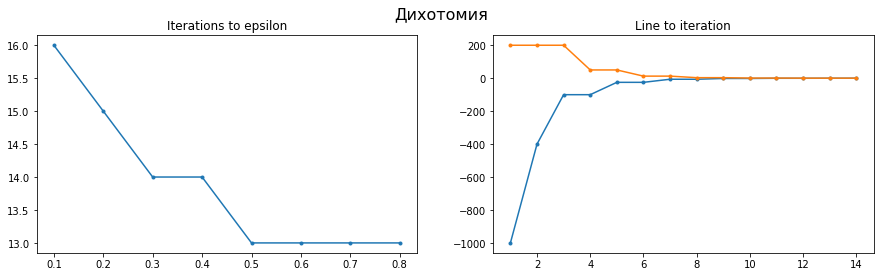

In [18]:
build_one_dimen_plots(dichotomy, function, "Дихотомия")

[0.6180339887498949, 0.6180339887498947, 0.618033988749895, 0.6180339887498949, 0.6180339887498951, 0.6180339887498949, 0.6180339887498953, 0.6180339887498949, 0.6180339887498948, 0.6180339887498949, 0.618033988749895, 0.6180339887498948, 0.6180339887498949, 0.6180339887498834, 0.6180339887498949, 0.6180339887498949, 0.6180339887499245, 0.6180339887498949]


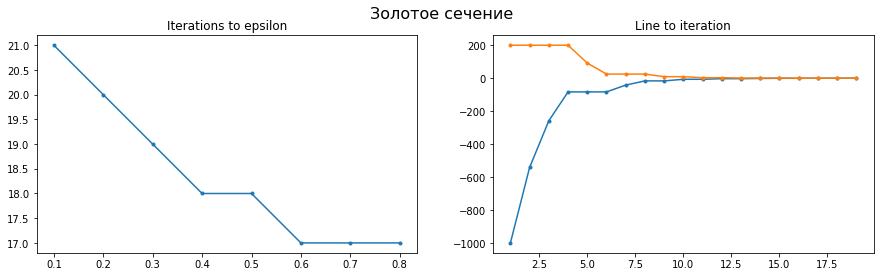

In [19]:
build_one_dimen_plots(golden_ratio, function, "Золотое сечение")

[0.6180339631667066, 0.6180340557275542, 0.6180339631667064, 0.6180338134001252, 0.6180342980550779, 0.6180327868852459, 0.6180368929511803, 0.6180257510729614, 0.6180555555555556, 0.6179775280898876, 0.6181818181818182, 0.6176470588235294, 0.6190476190476191, 0.6153889585577691, 0.625]


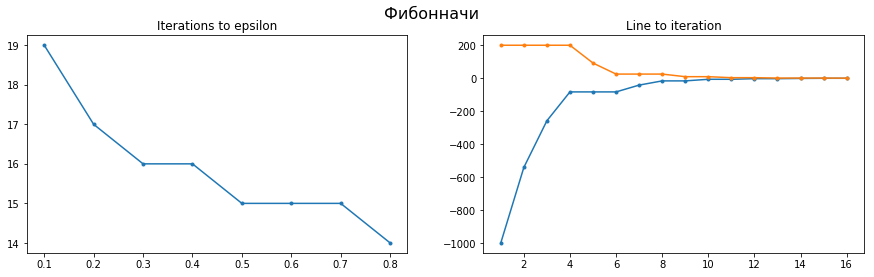

In [20]:
build_one_dimen_plots(fibonacci, function, "Фибонначи")

In [21]:
line_search(function, -180, 1e-3)

475.35

# №2
Реализуйте метод градиентного спуска и процедуру линейного поиска. Оцените, как меняется скорость сходимости, если для поиска величины шага использовать различные методы одномерного поиска.

In [84]:
def build_gradient_plot(func, func_grad, x, conv_cond):
    one_dim_methods = [dichotomy, golden_ratio, fibonacci, linear_search]
    one_dim_methods_name = ["Дихотомия", "Золотое сечение", "Фибонначи", "Линейный поиск"]
    iters_num = []
    for method in one_dim_methods:
        res, _, _ = gradient_descent(func, func_grad, x, method, conv_cond, eps=1e-2)
        iters_num.append(res)
    
    const_res, _, _ = gradient_descent(func, func_grad, x, conv_cond, None, True)
    print(const_res)
    fig, ax = plt.subplots()
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_locator(ticker.MaxNLocator(integer=True))
        
    y_pos = np.arange(len(one_dim_methods))
    ax.barh(y_pos, iters_num, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(one_dim_methods_name)
    ax.invert_yaxis()
    ax.set_xlabel('iterations')
    ax.set_title('Gradient convergence')

In [203]:
def linear_search(func, grad, x0):
    alpha = 1
    c = 0.5
    f0 = func(x0)
    df_f0 = np.dot(grad, grad)
    while func(x0 - alpha * grad) > f0 + c * alpha * df_f0:
        alpha = alpha / 2
    return alpha


def gradient_descent(func, func_grad, x, step_search_method, conv_condition, max_iter, const_step=False, step=1e-5, eps=1e-3):
    trace = [x]
    y = func(x)
    step_number = 0
    while True:
        step_number += 1
        grad = func_grad(x)
        if not const_step:
            if step_search_method is linear_search:
                step = linear_search(func, grad, x)
            else:
                step = get_step(func, x, grad, step_search_method)
        next_x = x - step * grad
        next_y = func(next_x)
        if step_number > max_iter:
            return step_number, y, trace
        if conv_condition == 'grad':
            if np.linalg.norm(grad) < eps:
                return step_number, y, trace
        else:
            if abs(next_y - y) < eps:
                return step_number, y, trace
        x = next_x
        trace.append(x)
        y = next_y


def get_step(function, x, grad, search_method):
    def optimization_problem(alpha):
        return function(x - alpha * grad)
    right_border = line_search(optimization_problem, 0.)
    res, _, _, _ = search_method(optimization_problem, 0., right_border)
    return res

In [180]:
function = lambda x: x ** 2
function_grad = lambda x: 2 * x

149786


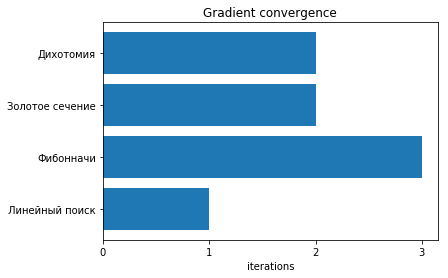

In [185]:
build_gradient_plot(function, function_grad, -100, 'arg')

# №3
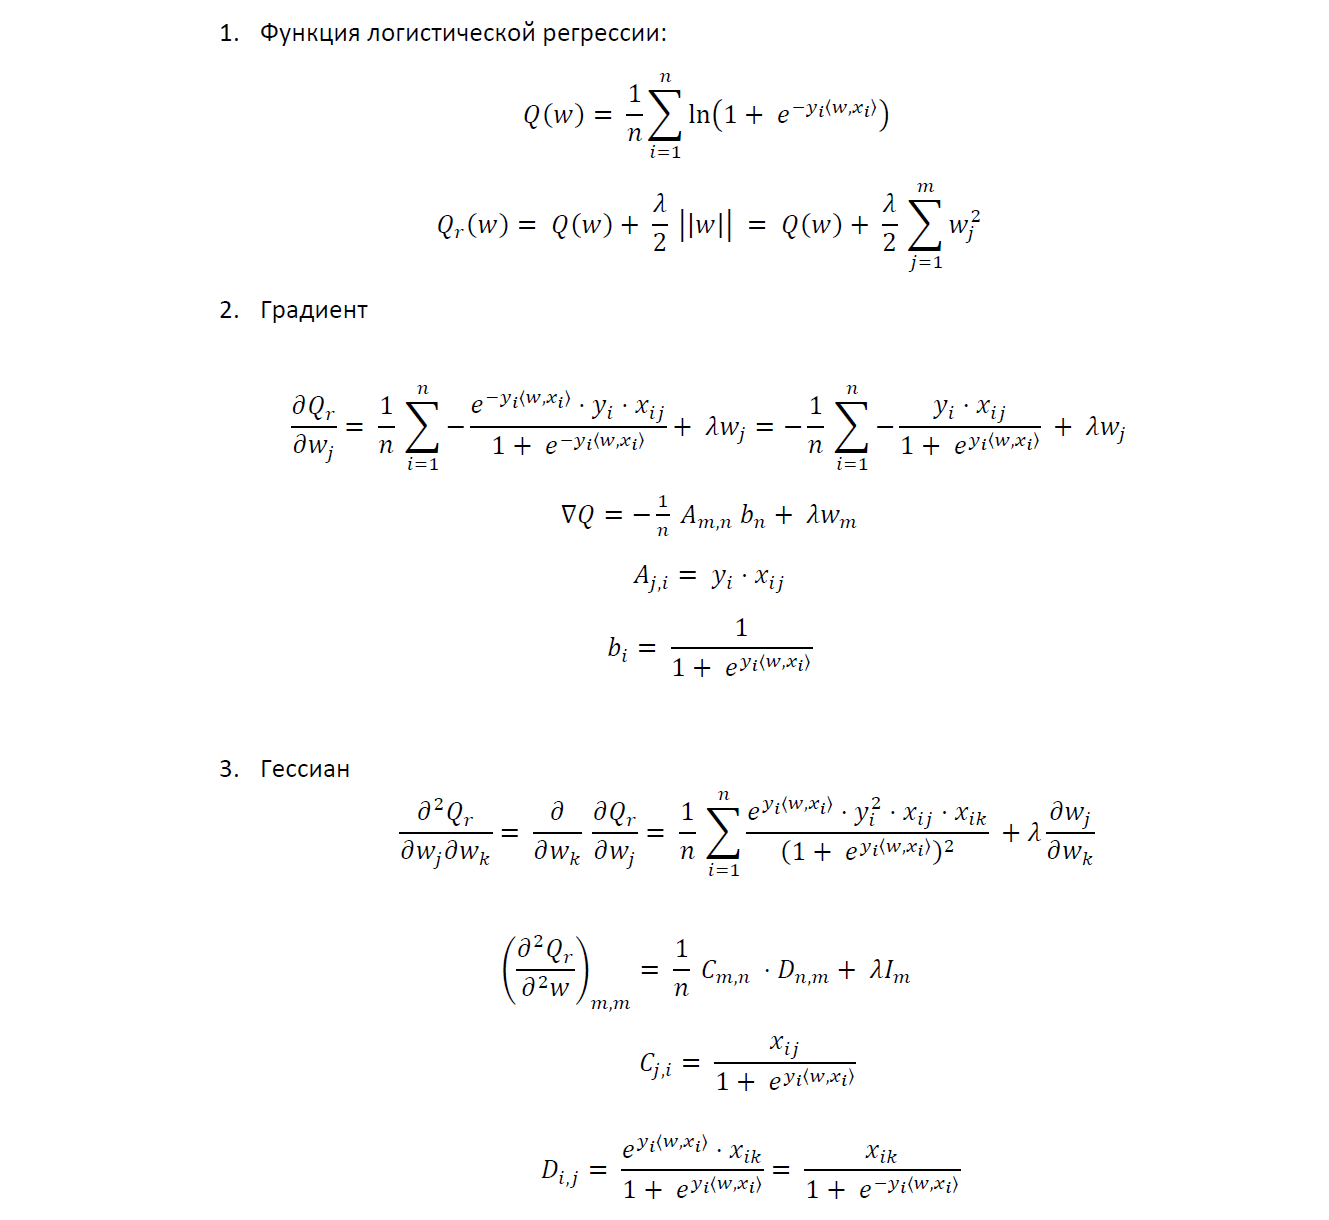

# №4
Реализуйте саму логистическую регрессию

In [3]:
class Logistic:
	def __init__(self, lmb, learning_rate, amount_steps=100000, eps=1e-5):
		self.lmb = lmb
		self.learning_rate = learning_rate
		self.amount_steps = amount_steps
		self.eps = eps
		self.w = None

	def __init_weight(self, m):
		self.w = np.random.normal(loc=0., scale=1., size=m)

	def __evaluate_Q(self, X, y, n):
		predictions = np.matmul(X, self.w)
		margins = predictions * y
		losses = np.logaddexp(0, -margins)
		return 1 / n * losses + self.lmb / 2 * np.sum(np.square(self.w))

	def __evaluate_gradient_Q(self, X, y, n):
		predictions = np.matmul(X, self.w)
		margins = predictions * y
		b = expit(-margins)
		A = np.transpose(X * y.reshape((n, 1)))
		return -1 / n * np.matmul(A, b) + self.lmb * self.w

	def __evaluate_hessian_Q(self, X, y, n, m):
		predictions = np.matmul(X, self.w)
		margins = predictions * y
		C = np.transpose(X * expit(-margins).reshape((n, 1)))
		D = X * expit(margins).reshape((n, 1))
		return 1 / n * np.matmul(C, D) + self.lmb * np.eye(m)

	def fit(self, X, y, solution_type):
		n, m = X.shape
		self.__init_weight(m)
		Q = self.__evaluate_Q(X, y, n)
		for s in range(self.amount_steps):
			if solution_type == 'gradient':
				self.w = self.w - self.learning_rate * self.__evaluate_gradient_Q(X, y, n)
				new_Q = self.__evaluate_Q(X, y, n)
				if np.linalg.norm(new_Q - Q) < self.eps:
					break
				Q = new_Q
			elif solution_type == 'newton':
				hess = self.__evaluate_hessian_Q(X, y, n, m)
				hess_inv = cho_solve(cho_factor(hess), np.eye(hess.shape[0]))
				delta = np.matmul(self.__evaluate_gradient_Q(X, y, n), hess_inv)
				self.w = self.w - delta
				if np.linalg.norm(delta) < self.eps:
					break
			else:
				print(f'This type of solution {solution_type} is not supported')

	def predict(self, X):
		return [np.sign(np.dot(x_i, self.w)) for x_i in X]

# №5
Реализуйте метод ньютона

In [225]:
from scipy.linalg import cho_factor, cho_solve
def newton(func, func_grad, func_hess, x, step_search_method, conv_condition, eps=1e-3):
    trace = [x]
    y = func(x)
    step_number = 0
    while True:
        step_number += 1
        grad = func_grad(x)
        hess = func_hess(x)
        hess_inv = cho_solve(cho_factor(cur_hess), numpy.eye(cur_hess.shape[0]))
        next_x = x - matmul(grad, hess_inv)
        next_y = func(next_x)
        if conv_condition == 'grad':
            if np.linalg.norm(grad) < eps:
                return step_number, y, trace
        else:
            if abs(next_y - y) < eps:
                return step_number, y, trace
        x = next_x
        trace.append(x)
        y = next_y

# №6
Проанализируйте траекторию градиентного спуска для нескольких квадратичных функций: придумайте две-три квадратичные двумерные функции, на которых работа метода будет отличаться, нарисуйте графики с линиями уровня функций и траекториями методов. Попробуйте ответить на следующий вопрос: Как отличается поведение метода в зависимости от числа обусловленности функции, выбора начальной точки и стратегии выбора шага (константная стратегия, Армихо)?

In [3]:
def rosenbrock_fun(x):
    return ((1. - x[0]) ** 2) + 100 * ((x[1] - x[0] ** 2) ** 2)

def rosenbrock_fun_grad(x):
    dx1 = 2 * (200 * (x[0] ** 3) - 200 * x[0] * x[1] + x[0] - 1)
    dx2 = 200 * (x[1] - (x[0] ** 2))
    return np.array([dx1, dx2])

In [221]:
def draw_function(func, func_grad, x, method):
    step_num, res, trace = gradient_descent(func, func_grad, x, method, 'grad', max_iter=30, eps=1e-8)
    print("steps -", step_num, "result -", res)
    if func is rosenbrock_fun and len(trace) > 500:
        trace = trace[0::10]
    X1 = np.arange(-50, 50, 0.1)
    X2 = np.arange(-50, 50, 0.1)
    Y = np.array([[func(np.array([x, y])) for x in X1] for y in X2])
    plt.figure(figsize=(16,8))
    plt.contour(X1, X2, Y, levels=100, cmap='summer')
    for i in range(len(trace) - 1):
        cur_point = trace[i]
        next_point = trace[i + 1]
        plt.scatter([cur_point[0]], [cur_point[1]])
        plt.plot([cur_point[0], next_point[0]], [cur_point[1], next_point[1]])
    plt.grid()
    plt.show()

steps - 31 result - 19.1911168984375


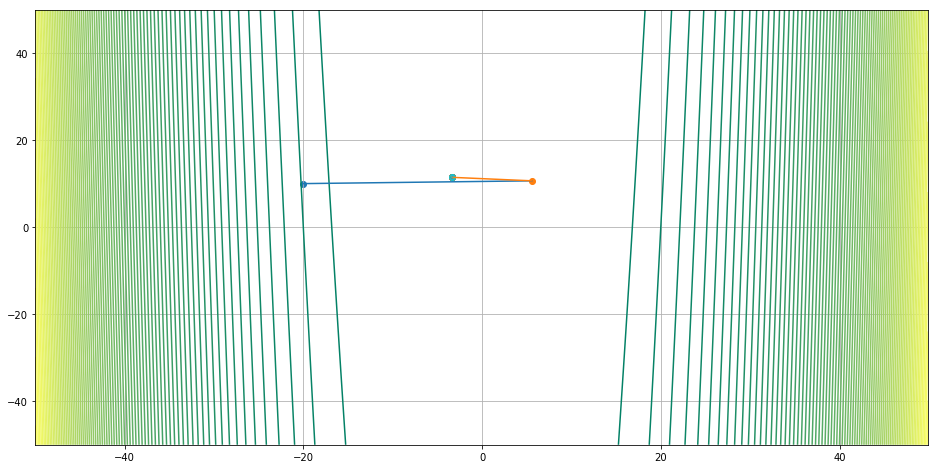

In [224]:
draw_function(rosenbrock_fun, rosenbrock_fun_grad, np.array([-20, 10]), golden_ratio)

In [200]:
def sum_squares_f(args):
    return np.sum(args ** 2)

def sum_squares_grad(args):
    return 2 * args

steps - 3 result - 3.048424479101144e-20


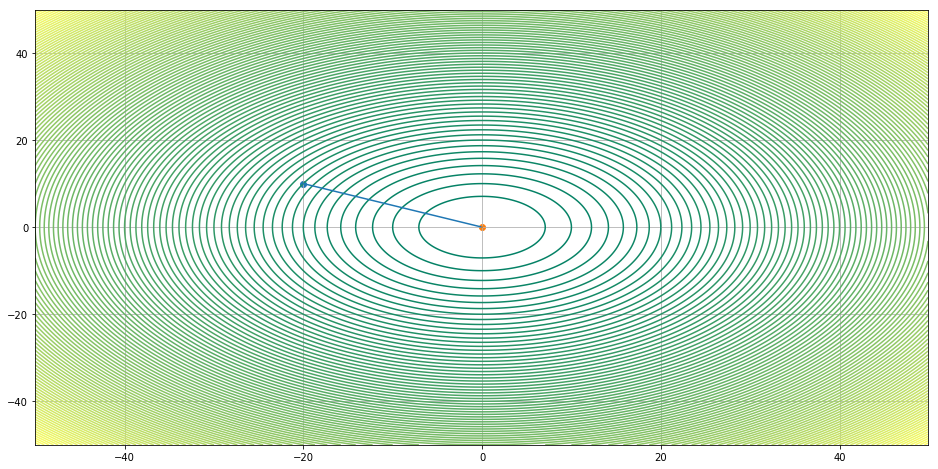

In [226]:
draw_function(sum_squares_f, sum_squares_grad, np.array([-20, 10]), golden_ratio)

In [165]:
def compare_step_strategy():
    const_steps, const_ans, _ = gradient_descent(sum_squares_f, sum_squares_grad, np.array([-100, 10]), None, 'grad', const_step=True, eps=1e-5)
    dichotomy_steps, dichotomy_ans, _ = gradient_descent(sum_squares_f, sum_squares_grad, np.array([-100, 10]), dichotomy, 'grad', eps=1e-5)
    print("const ans", const_ans, "dichotomy ans", dichotomy_ans)
    print("const steps -", const_steps, "dichotomy steps -", dichotomy_steps)

In [166]:
compare_step_strategy()

const ans 2.4999491710300814e-11 dichotomy ans 3.8847573400399525e-13
const steps - 840804 dichotomy steps - 3


In [169]:
def compare_init_values_strategy():
    far_steps, far_ans, _ = gradient_descent(sum_squares_f, sum_squares_grad, np.array([-10000, 5343]), dichotomy, 'grad', eps=1e-5)
    close_steps, close_ans, _ = gradient_descent(sum_squares_f, sum_squares_grad, np.array([-100, 30]), dichotomy, 'grad', eps=1e-5)
    print("far steps -", far_steps, "far ans -", far_ans)
    print("close step -", close_steps, "close ans -", close_ans)

In [170]:
compare_init_values_strategy()

far steps - 4 far ans - 5.024444371212747e-16
close step - 3 close ans - 4.192460891726521e-13


In [150]:
args = np.array([-100, 10])
args2 = np.array([-100, 10.1])
print('square -', abs(sum_squares_f(args) - sum_squares_f(args2)), 'rosenbrock -', abs(rosenbrock_fun(args) - rosenbrock_fun(args2)))

square - 2.0100000000002183 rosenbrock - 199799.0


# №7
Исследуйте, как зависит число итераций, необходимое градиентному спуску для сходимости, от следующих двух параметров:
Числа обусловленности и размерности пространства оптимизируемых переменных


In [171]:
def create_matrix(condition_number, n):
    r = math.sqrt(condition_number)
    A = np.random.randn(n, n)
    u, s, v = np.linalg.svd(A)
    h, l = np.max(s), np.min(s)  # highest and lowest eigenvalues (h / l = current cond number)

    # linear stretch: f(x) = a * x + b, f(h) = h, f(l) = h/r, cond number = h / (h/r) = r
    def f(x):
        return h * (1 - ((r - 1) / r) / (h - l) * (h - x))

    new_s = f(s)
    new_A = (u * new_s) @ v.T  # make inverse transformation (here cond number is sqrt(k))
    new_A = new_A @ new_A.T  # make matrix symmetric and positive semi-definite (cond number is just k)
    assert np.isclose(np.linalg.cond(new_A), condition_number)
    return new_A


def number_of_iters(cond, n_vars, n_checks=100):
    avg_iters = 0
    for _ in range(n_checks):
        A = create_matrix(cond, n_vars)
        b = np.random.randn(len(A))
        init_x = np.random.randn(len(A))
        func = lambda x: x.dot(A).dot(x) - b.dot(x)
        func_grad = lambda x: (A + A.T).dot(x) - b

        steps, _, _ = gradient_descent(func, func_grad, init_x, None, 'grad', const_step = True, step=1e-3, eps=1e-3)
        avg_iters += steps
    return avg_iters / n_checks

In [176]:
matrix = create_matrix(5.5, 5)

In [177]:
matrix.shape

(5, 5)

In [147]:
def build_dependency_plot():
    ns = list(range(2, 13, 2))
    condition_numbers = np.linspace(1, 20, 6)
    plt.figure()
    for n in ns:
        iter_numbers = [number_of_iters(cond, n) for cond in condition_numbers]
        plt.plot(condition_numbers, iter_numbers, label='n={}'.format(n))

    plt.xlabel('k')
    plt.ylabel('T(n, k)')
    plt.legend()
    plt.show()

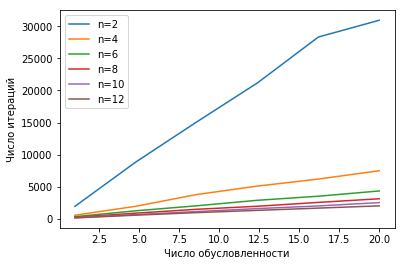

In [148]:
build_dependency_plot()

# №8
Сравните методы градиентного спуска и Ньютона на задаче обучения логистической регрессии.

In [13]:
from Utils import k_fold_cross_validation, f_measure

CLASSES_NUMBER = 2

def read_dataset(path):
	data = pd.read_csv(path)
	X = data.iloc[:, :-1].values
	y = data.iloc[:, -1].apply(lambda c: 1 if c == 'P' else -1).values
	return X, y


def logistic(train_X, train_y, test_X, test_y, lmb, learning_rate, solution_type):
	cls = Logistic(lmb, learning_rate)
	cls.fit(train_X, train_y, solution_type)
	predict_result = cls.predict(test_X)

	confusion_matrix = [[0] * CLASSES_NUMBER for _ in range(CLASSES_NUMBER)]
	cm_map = {-1.0: 0, 1.0: 1}
	for (clf_ans, ans) in zip(predict_result, test_y):
		confusion_matrix[cm_map.get(clf_ans)][cm_map.get(ans)] += 1
	return f_measure(confusion_matrix, CLASSES_NUMBER)


def train_dataset(X, y, lmb, learning_rate, solution_type):
	k = 5
	amount_f = 0
	for [train_X, train_y, test_X, test_y] in k_fold_cross_validation(k, X, y, CLASSES_NUMBER):
		amount_f += logistic(train_X, train_y, test_X, test_y, lmb, learning_rate, solution_type)

	avg_f = amount_f / k
	return avg_f


def find_best(X, y, solution_type):
	best_F = -1
	best_lmb = None
	best_rate = None
	for lmb in [1e-4, 1e-3, 1e-2, 1e-1, 1.]:
		for learning_rate in [1e-3, 1e-5, 1e-8]:
			f_score = train_dataset(X, y, lmb, learning_rate, solution_type)
			if f_score > best_F:
				best_F = f_score
				best_lmb = lmb
				best_rate = learning_rate

	print(f'best F-measure with {solution_type}: {best_F}, lambda: {best_lmb}, learning_rate: {best_rate}')

In [14]:
X, y = read_dataset('data/geyser.csv')
find_best(X, y, 'gradient')
find_best(X, y, 'newton')

best F-measure with gradient: 0.7702522694970847, lambda: 0.01, learning_rate: 0.001
best F-measure with newton: 0.5163325389779884, lambda: 1.0, learning_rate: 1e-08
